In [1]:
import pandas as pd

In [18]:
df = pd.read_csv("/Users/user/Documents/GitHub/Applied-Data-Analytics/Datasets/heights.csv")


In [19]:
df

,height
0,182.395153
1,177.369198
2,182.198838
3,176.988964
4,163.689656
...,...
9995,172.694718
9996,184.422508
9997,193.775173
9998,185.282704


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x117803050>]],
      dtype=object)

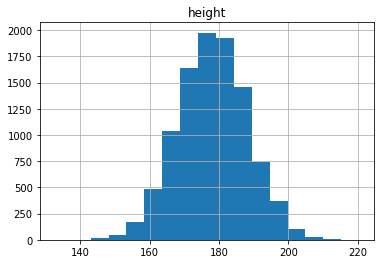

In [16]:
df.hist(bins=17)